In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
import pyhere


In [2]:
dir_data_raw = pyhere.here().resolve().joinpath("data", "raw")
dir_data_interim = pyhere.here().resolve().joinpath("data", "interim")
dir_data_external = pyhere.here().resolve().joinpath("data", "external")

In [3]:
csv_power_plants = pd.read_csv(dir_data_interim/"power_plants_with_generation_transformed.csv", index_col=[0])

In [4]:
df_transformed = pd.read_csv(dir_data_external/"transformed_data_combined_with_nasa.csv", index_col=['index'])
df_transformed

,latitude,longitude,ANN_CLRSKY_SFC_SW_DNI_2009,ANN_CLRSKY_SFC_SW_DNI_2010,ANN_TQV_2009,ANN_TQV_2010,ANN_WS10M_2009,ANN_WS10M_2010,autumn_CLRSKY_SFC_SW_DNI_2009,autumn_CLRSKY_SFC_SW_DNI_2010,...,summer_TQV_2009,summer_TQV_2010,summer_WS10M_2009,summer_WS10M_2010,winter_CLRSKY_SFC_SW_DNI_2009,winter_CLRSKY_SFC_SW_DNI_2010,winter_TQV_2009,winter_TQV_2010,winter_WS10M_2009,winter_WS10M_2010
index,,,,,,,,,,,,,,,,,,,,,
0,32.3220,65.1190,7.72,7.76,9.75,9.77,3.36,3.26,7.440000,8.013333,...,10.276667,11.860000,3.893333,3.386667,6.560000,7.016667,9.003333,9.106667,2.843333,2.963333
1,31.6700,65.7950,7.47,7.36,10.63,10.71,3.22,3.09,7.420000,7.620000,...,11.146667,13.940000,3.183333,3.063333,6.536667,7.096667,10.183333,9.613333,3.196667,3.223333
2,31.6230,65.7920,7.47,7.36,10.63,10.71,3.22,3.09,7.420000,7.620000,...,11.146667,13.940000,3.183333,3.063333,6.536667,7.096667,10.183333,9.613333,3.196667,3.223333
3,34.5560,69.4787,7.96,7.96,8.84,10.03,2.87,2.72,7.240000,7.670000,...,11.420000,15.633333,3.516667,2.890000,7.080000,7.180000,6.540000,6.843333,2.373333,2.356667
4,34.6410,69.7170,7.96,7.96,10.67,12.15,2.39,2.34,7.240000,7.670000,...,15.133333,20.490000,2.380000,2.076667,7.080000,7.180000,7.730000,8.060000,2.070000,2.053333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10805,44.6565,4.7562,7.55,7.58,16.30,16.12,4.67,4.72,6.096667,6.083333,...,23.143333,22.363333,4.016667,4.470000,7.153333,6.736667,9.060000,9.873333,5.346667,4.806667
10806,48.6683,1.1064,6.98,7.16,16.81,15.87,4.43,4.46,5.186667,5.290000,...,22.946667,23.490000,3.953333,3.783333,6.210000,5.973333,10.110000,9.780000,4.633333,5.120000
10807,47.8779,-2.5908,6.88,6.96,17.45,16.52,4.59,4.52,8.746667,8.636667,...,11.376667,10.576667,4.666667,5.143333,8.056667,8.710000,23.113333,23.253333,4.383333,3.983333


In [5]:
df_transformed.columns

Index(['latitude', 'longitude', 'ANN_CLRSKY_SFC_SW_DNI_2009',
       'ANN_CLRSKY_SFC_SW_DNI_2010', 'ANN_TQV_2009', 'ANN_TQV_2010',
       'ANN_WS10M_2009', 'ANN_WS10M_2010', 'autumn_CLRSKY_SFC_SW_DNI_2009',
       'autumn_CLRSKY_SFC_SW_DNI_2010', 'autumn_TQV_2009', 'autumn_TQV_2010',
       'autumn_WS10M_2009', 'autumn_WS10M_2010',
       'spring_CLRSKY_SFC_SW_DNI_2009', 'spring_CLRSKY_SFC_SW_DNI_2010',
       'spring_TQV_2009', 'spring_TQV_2010', 'spring_WS10M_2009',
       'spring_WS10M_2010', 'summer_CLRSKY_SFC_SW_DNI_2009',
       'summer_CLRSKY_SFC_SW_DNI_2010', 'summer_TQV_2009', 'summer_TQV_2010',
       'summer_WS10M_2009', 'summer_WS10M_2010',
       'winter_CLRSKY_SFC_SW_DNI_2009', 'winter_CLRSKY_SFC_SW_DNI_2010',
       'winter_TQV_2009', 'winter_TQV_2010', 'winter_WS10M_2009',
       'winter_WS10M_2010'],
      dtype='object')

In [7]:
csv_power_plants.loc[0:10809, ['capacity_mw', 'primary_fuel_transformed']].index.name = "index"
csv_power_plants.index.rename('index', inplace=True)
csv_power_plants


,capacity_mw,latitude,longitude,primary_fuel_transformed
index,,,,
0,33.0,32.3220,65.1190,Other
1,10.0,31.6700,65.7950,Solar
2,10.0,31.6230,65.7920,Solar
3,66.0,34.5560,69.4787,Other
4,100.0,34.6410,69.7170,Other
...,...,...,...,...
34931,50.0,-12.9667,28.6333,Other
34932,20.0,-12.8167,28.2000,Other
34933,108.0,-17.9167,25.8500,Other


In [8]:
df_transformed_combined = df_transformed.merge(csv_power_plants.loc[0:10809, ['capacity_mw', 'primary_fuel_transformed']],left_on="index", right_on="index")

In [9]:
df_transformed_combined

,latitude,longitude,ANN_CLRSKY_SFC_SW_DNI_2009,ANN_CLRSKY_SFC_SW_DNI_2010,ANN_TQV_2009,ANN_TQV_2010,ANN_WS10M_2009,ANN_WS10M_2010,autumn_CLRSKY_SFC_SW_DNI_2009,autumn_CLRSKY_SFC_SW_DNI_2010,...,summer_WS10M_2009,summer_WS10M_2010,winter_CLRSKY_SFC_SW_DNI_2009,winter_CLRSKY_SFC_SW_DNI_2010,winter_TQV_2009,winter_TQV_2010,winter_WS10M_2009,winter_WS10M_2010,capacity_mw,primary_fuel_transformed
index,,,,,,,,,,,,,,,,,,,,,
0,32.3220,65.1190,7.72,7.76,9.75,9.77,3.36,3.26,7.440000,8.013333,...,3.893333,3.386667,6.560000,7.016667,9.003333,9.106667,2.843333,2.963333,33.00000,Other
1,31.6700,65.7950,7.47,7.36,10.63,10.71,3.22,3.09,7.420000,7.620000,...,3.183333,3.063333,6.536667,7.096667,10.183333,9.613333,3.196667,3.223333,10.00000,Solar
2,31.6230,65.7920,7.47,7.36,10.63,10.71,3.22,3.09,7.420000,7.620000,...,3.183333,3.063333,6.536667,7.096667,10.183333,9.613333,3.196667,3.223333,10.00000,Solar
3,34.5560,69.4787,7.96,7.96,8.84,10.03,2.87,2.72,7.240000,7.670000,...,3.516667,2.890000,7.080000,7.180000,6.540000,6.843333,2.373333,2.356667,66.00000,Other
4,34.6410,69.7170,7.96,7.96,10.67,12.15,2.39,2.34,7.240000,7.670000,...,2.380000,2.076667,7.080000,7.180000,7.730000,8.060000,2.070000,2.053333,100.00000,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10805,44.6565,4.7562,7.55,7.58,16.30,16.12,4.67,4.72,6.096667,6.083333,...,4.016667,4.470000,7.153333,6.736667,9.060000,9.873333,5.346667,4.806667,3.90128,Solar
10806,48.6683,1.1064,6.98,7.16,16.81,15.87,4.43,4.46,5.186667,5.290000,...,3.953333,3.783333,6.210000,5.973333,10.110000,9.780000,4.633333,5.120000,24.02204,Solar
10807,47.8779,-2.5908,6.88,6.96,17.45,16.52,4.59,4.52,8.746667,8.636667,...,4.666667,5.143333,8.056667,8.710000,23.113333,23.253333,4.383333,3.983333,12.00000,Wind


<AxesSubplot:xlabel='primary_fuel_transformed'>

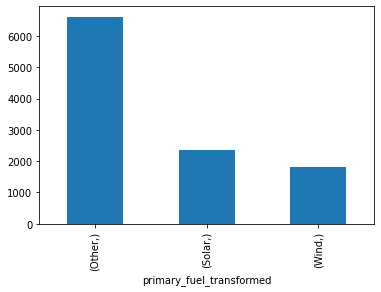

In [10]:

df_transformed_combined[['primary_fuel_transformed']].value_counts().plot.bar()

In [32]:
# df_transformed_combined.isna().sum()
# df_transformed_combined[df_transformed_combined.isna().any(axis=1)]
# df_transformed_combined.dropna(inplace = True)
pre_X = df_transformed_combined.drop(columns=['capacity_mw', 'latitude', 'longitude']).dropna()
X = pre_X.drop(columns=['primary_fuel_transformed'])
y = pre_X['primary_fuel_transformed']

In [33]:
y

index
0        Other
1        Solar
2        Solar
3        Other
4        Other
         ...  
10805    Solar
10806    Solar
10807     Wind
10808     Wind
10809     Wind
Name: primary_fuel_transformed, Length: 10809, dtype: object

In [34]:
def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [35]:
def get_accuracy(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = DecisionTreeClassifier(max_leaf_nodes = max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds_val)

    return accuracy

In [36]:
mi_scores = make_mi_scores(X, y)
mi_scores[::3]

autumn_TQV_2010                  0.444657
autumn_TQV_2009                  0.439883
winter_TQV_2010                  0.435080
winter_CLRSKY_SFC_SW_DNI_2010    0.415997
ANN_TQV_2009                     0.401432
spring_CLRSKY_SFC_SW_DNI_2010    0.398776
ANN_TQV_2010                     0.390743
autumn_WS10M_2010                0.380868
summer_WS10M_2009                0.354159
ANN_WS10M_2009                   0.307425
Name: MI Scores, dtype: float64

In [37]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

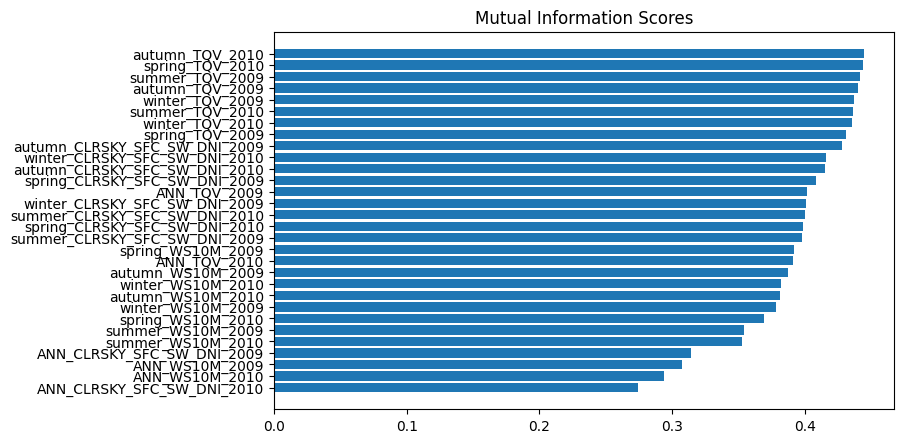

In [38]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [39]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

## DECISION TREE CLASSIFIER

<AxesSubplot:>

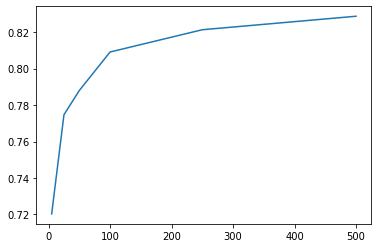

In [40]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
results = {}
# Write loop to find the ideal tree size from candidate_max_leaf_nodes


results = {node: get_accuracy(node, train_X, val_X, train_y, val_y) for node in candidate_max_leaf_nodes}
# for node in candidate_max_leaf_nodes:
#     results[node] = get_accuracy(node, X_train, X_test, y_train, y_test)
# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_tree_size = min(results, key=results.get)
sns.lineplot(data=results, x= results.keys(), y= results.values())

In [41]:
tree_model = DecisionTreeClassifier(max_leaf_nodes = best_tree_size, random_state=0)
tree_model.fit(train_X, train_y)
y_pred = tree_model.predict(val_X)
# print(cross_val_score(tree_model, X, y, cv=5))

<AxesSubplot:>

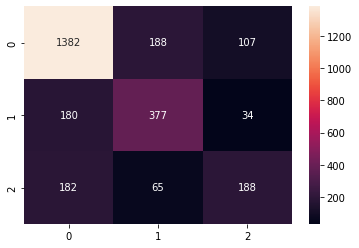

In [46]:
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

In [47]:
accuracy_score(val_y, y_pred)

0.7203107658157603

In [48]:
precision_score(val_y, y_pred, average='weighted')

0.7144433752959957

In [49]:
tree_model.score(val_X, val_y)

0.7203107658157603

In [50]:
# tree.plot_tree(tree_model)

# RANDOM FOREST CLASSIFIER

In [51]:
RF_model = RandomForestClassifier(random_state=0)
RF_model.fit(train_X, train_y)
y_pred = RF_model.predict(val_X)
# print(cross_val_score(tree_model, X, y, cv=5))

<AxesSubplot:>

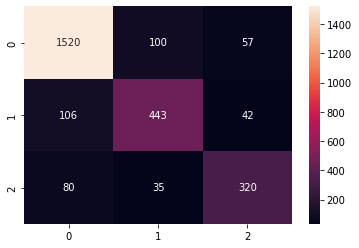

In [55]:
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

In [56]:
accuracy_score(val_y, y_pred)

0.8446170921198668

In [58]:
RF_model.score(val_X, val_y)

0.8446170921198668